In [1]:
pip install rasterio numpy matplotlib geopandas

In [2]:
import os
import rasterio
import numpy as np
import geopandas as gpd
from rasterio.features import shapes
import matplotlib.pyplot as plt

In [3]:
# --- PARAMETERS ---
# Set your file paths for the visualized NDSI GeoTIFFs from each folder:
ndsi_old_path = '/content/2020-01-02-00_00_2020-01-02-23_59_Sentinel-2_L1C_NDSI.tiff'
ndsi_new_path = '/content/2025-01-10-00_00_2025-01-10-23_59_Sentinel-2_L1C_NDSI.tiff'

NDSI_THRESHOLD = 0.4  # Threshold for glacier mask (adjust as needed)
SHIFT_X = 0  # Set pixel shift X if images are misaligned
SHIFT_Y = 0  # Set pixel shift Y if images are misaligned

In [4]:
# --- FUNCTIONS ---

# Load and threshold NDSI raster (optional pixel shift for alignment)
def load_ndsi_mask(path, threshold=NDSI_THRESHOLD, shift_x=0, shift_y=0):
    with rasterio.open(path) as src:
        ndsi = src.read(1)
        # Apply pixel shift if needed
        if shift_x or shift_y:
            ndsi = np.roll(ndsi, shift_y, axis=0)
            ndsi = np.roll(ndsi, shift_x, axis=1)
            # Zero-out wrapped pixels (for clear registration)
            if shift_y > 0: ndsi[:shift_y,:] = 0
            elif shift_y < 0: ndsi[shift_y:,:] = 0
            if shift_x > 0: ndsi[:,:shift_x] = 0
            elif shift_x < 0: ndsi[:,shift_x:] = 0
        mask = (ndsi >= threshold).astype(np.uint8)
        profile = src.profile
    return mask, profile

In [5]:
# Convert binary mask to glacier polygons
from shapely.geometry import shape

def mask_to_polygons(mask, profile):
    geoms = []
    for geom, val in shapes(mask, mask=mask, transform=profile['transform']):
        if val == 1:
            # Convert GeoJSON-like dictionary to Shapely geometry object
            geoms.append(shape(geom))
    # Create GeoDataFrame from a list of Shapely geometries
    gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(geoms), crs=profile['crs'])
    return gdf

In [6]:
# Calculate glacier area in km^2 (using an equal-area CRS)
def calculate_area_km2(gdf):
    eq_area_crs = 'EPSG:6933'  # World Cylindrical Equal Area
    gdf_proj = gdf.to_crs(eq_area_crs)
    area_sqm = gdf_proj.geometry.area.sum()
    return area_sqm / 1e6

In [7]:
# Plot glacier boundaries before/after depletion
def plot_depletion(gdf_old, gdf_new):
    ax = gdf_old.boundary.plot(color='red', linewidth=2, label='Old Glacier')
    gdf_new.boundary.plot(ax=ax, color='blue', linewidth=2, label='New Glacier')
    plt.legend(['Old Glacier', 'New Glacier'])
    plt.title('Glacier Depletion Visualization')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

In [8]:
# --- MAIN WORKFLOW ---
def glacier_depletion_analysis(old_path, new_path, shift_x=0, shift_y=0, ndsi_threshold=0.4):
    mask_old, profile_old = load_ndsi_mask(old_path, threshold=ndsi_threshold)
    mask_new, profile_new = load_ndsi_mask(new_path, threshold=ndsi_threshold, shift_x=shift_x, shift_y=shift_y)
    gdf_old = mask_to_polygons(mask_old, profile_old)
    gdf_new = mask_to_polygons(mask_new, profile_new)
    area_old = calculate_area_km2(gdf_old)
    area_new = calculate_area_km2(gdf_new)
    area_change = area_old - area_new
    plot_depletion(gdf_old, gdf_new)
    print(f'Glacier area (old): {area_old:.2f} km²')
    print(f'Glacier area (new): {area_new:.2f} km²')
    print(f'Loss in glacier area: {area_change:.2f} km² ({(100*area_change/area_old):.2f}%)')

# --- Example usage ---
# glacier_depletion_analysis(ndsi_old_path, ndsi_new_path, shift_x=SHIFT_X, shift_y=SHIFT_Y, ndsi_threshold=NDSI_THRESHOLD)



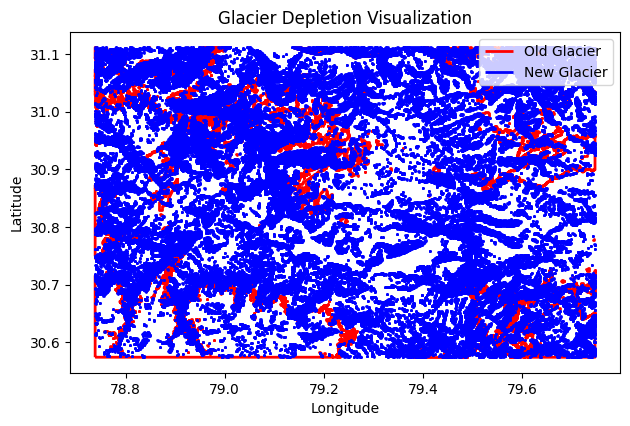

Glacier area (old): 1325.40 km²
Glacier area (new): 900.17 km²
Loss in glacier area: 425.23 km² (32.08%)


In [9]:
glacier_depletion_analysis(ndsi_old_path, ndsi_new_path, shift_x=SHIFT_X, shift_y=SHIFT_Y, ndsi_threshold=NDSI_THRESHOLD)

In [ ]:
# Ensure GeoDataFrames have CRS set to EPSG:4326 (WGS84)
gdf_old_latlon = gdf_old.to_crs(epsg=4326)
gdf_new_latlon = gdf_new.to_crs(epsg=4326)

# Optionally, export these to GeoJSON files (not required for Folium, but useful for later use)
gdf_old_latlon.to_file("old_glacier.geojson", driver="GeoJSON")
gdf_new_latlon.to_file("new_glacier.geojson", driver="GeoJSON")


NameError: name 'gdf_old' is not defined

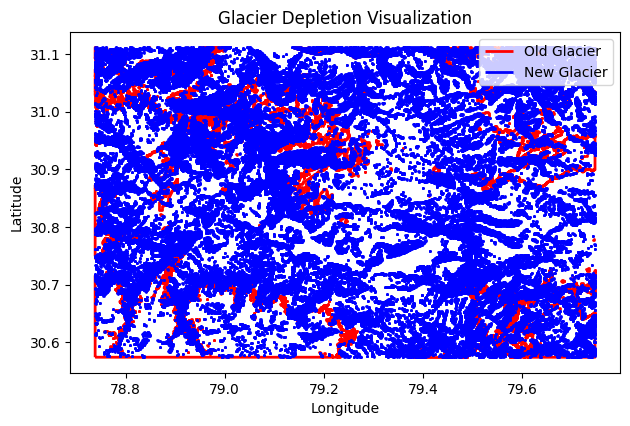

Glacier area (old): 1325.40 km²
Glacier area (new): 900.17 km²
Loss in glacier area: 425.23 km² (32.08%)


NameError: name 'gdf_old' is not defined

In [10]:
import os
import rasterio
import numpy as np
import geopandas as gpd
from rasterio.features import shapes
import matplotlib.pyplot as plt

# --- PARAMETERS ---
# Set your file paths for the visualized NDSI GeoTIFFs from each folder:
ndsi_old_path = '/content/2020-01-02-00_00_2020-01-02-23_59_Sentinel-2_L1C_NDSI.tiff'
ndsi_new_path = '/content/2025-01-10-00_00_2025-01-10-23_59_Sentinel-2_L1C_NDSI.tiff'

NDSI_THRESHOLD = 0.4  # Threshold for glacier mask (adjust as needed)
SHIFT_X = 0  # Set pixel shift X if images are misaligned
SHIFT_Y = 0  # Set pixel shift Y if images are misaligned

# --- FUNCTIONS ---

# Load and threshold NDSI raster (optional pixel shift for alignment)
def load_ndsi_mask(path, threshold=NDSI_THRESHOLD, shift_x=0, shift_y=0):
    with rasterio.open(path) as src:
        ndsi = src.read(1)
        # Apply pixel shift if needed
        if shift_x or shift_y:
            ndsi = np.roll(ndsi, shift_y, axis=0)
            ndsi = np.roll(ndsi, shift_x, axis=1)
            # Zero-out wrapped pixels (for clear registration)
            if shift_y > 0: ndsi[:shift_y,:] = 0
            elif shift_y < 0: ndsi[shift_y:,:] = 0
            if shift_x > 0: ndsi[:,:shift_x] = 0
            elif shift_x < 0: ndsi[:,shift_x:] = 0
        mask = (ndsi >= threshold).astype(np.uint8)
        profile = src.profile
    return mask, profile

# Convert binary mask to glacier polygons
from shapely.geometry import shape

def mask_to_polygons(mask, profile):
    geoms = []
    for geom, val in shapes(mask, mask=mask, transform=profile['transform']):
        if val == 1:
            # Convert GeoJSON-like dictionary to Shapely geometry object
            geoms.append(shape(geom))
    # Create GeoDataFrame from a list of Shapely geometries
    gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(geoms), crs=profile['crs'])
    return gdf

# Calculate glacier area in km^2 (using an equal-area CRS)
def calculate_area_km2(gdf):
    eq_area_crs = 'EPSG:6933'  # World Cylindrical Equal Area
    gdf_proj = gdf.to_crs(eq_area_crs)
    area_sqm = gdf_proj.geometry.area.sum()
    return area_sqm / 1e6

# Plot glacier boundaries before/after depletion
def plot_depletion(gdf_old, gdf_new):
    ax = gdf_old.boundary.plot(color='red', linewidth=2, label='Old Glacier')
    gdf_new.boundary.plot(ax=ax, color='blue', linewidth=2, label='New Glacier')
    plt.legend(['Old Glacier', 'New Glacier'])
    plt.title('Glacier Depletion Visualization')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

# --- MAIN WORKFLOW ---
def glacier_depletion_analysis(old_path, new_path, shift_x=0, shift_y=0, ndsi_threshold=0.4):
    mask_old, profile_old = load_ndsi_mask(old_path, threshold=ndsi_threshold)
    mask_new, profile_new = load_ndsi_mask(new_path, threshold=ndsi_threshold, shift_x=shift_x, shift_y=shift_y)
    gdf_old = mask_to_polygons(mask_old, profile_old)
    gdf_new = mask_to_polygons(mask_new, profile_new)
    area_old = calculate_area_km2(gdf_old)
    area_new = calculate_area_km2(gdf_new)
    area_change = area_old - area_new
    plot_depletion(gdf_old, gdf_new)
    print(f'Glacier area (old): {area_old:.2f} km²')
    print(f'Glacier area (new): {area_new:.2f} km²')
    print(f'Loss in glacier area: {area_change:.2f} km² ({(100*area_change/area_old):.2f}%)')

# --- Example usage ---
# glacier_depletion_analysis(ndsi_old_path, ndsi_new_path, shift_x=SHIFT_X, shift_y=SHIFT_Y, ndsi_threshold=NDSI_THRESHOLD)

glacier_depletion_analysis(ndsi_old_path, ndsi_new_path, shift_x=SHIFT_X, shift_y=SHIFT_Y, ndsi_threshold=NDSI_THRESHOLD)

# Ensure GeoDataFrames have CRS set to EPSG:4326 (WGS84)
gdf_old_latlon = gdf_old.to_crs(epsg=4326)
gdf_new_latlon = gdf_new.to_crs(epsg=4326)

# Optionally, export these to GeoJSON files (not required for Folium, but useful for later use)
gdf_old_latlon.to_file("old_glacier.geojson", driver="GeoJSON")
gdf_new_latlon.to_file("new_glacier.geojson", driver="GeoJSON")
